## **EX NO:**
##   **DATE :**
# <center>**MULTIPLE LINEAR REGRESSION**</center>

## **AIM :**

### To implement Multiple Linear Regression  using Python, train a model on a given dataset with multiple independent variables, evaluate its performance using appropriate metrics, and analyze the relationship between the dependent and independent variables.

## **PROGRAM:**

#### **Importing Headers**

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 import statsmodels.api as sm
 from scipy.stats import probplot

#### **Importing the data set**

In [ ]:
df = pd.read_csv("/content/HousingData.csv")

In [ ]:
# Display the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### **Infomation about the data set**

In [ ]:
df.shape


(506, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### **Description of the Data Set**

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##**PREPROCESSING 1:**

## **Handle Missing Values**

###before handling null values

In [ ]:
#check for null values
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())

### after handling null values

In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## **Box plot**

<Figure size 800x500 with 0 Axes>

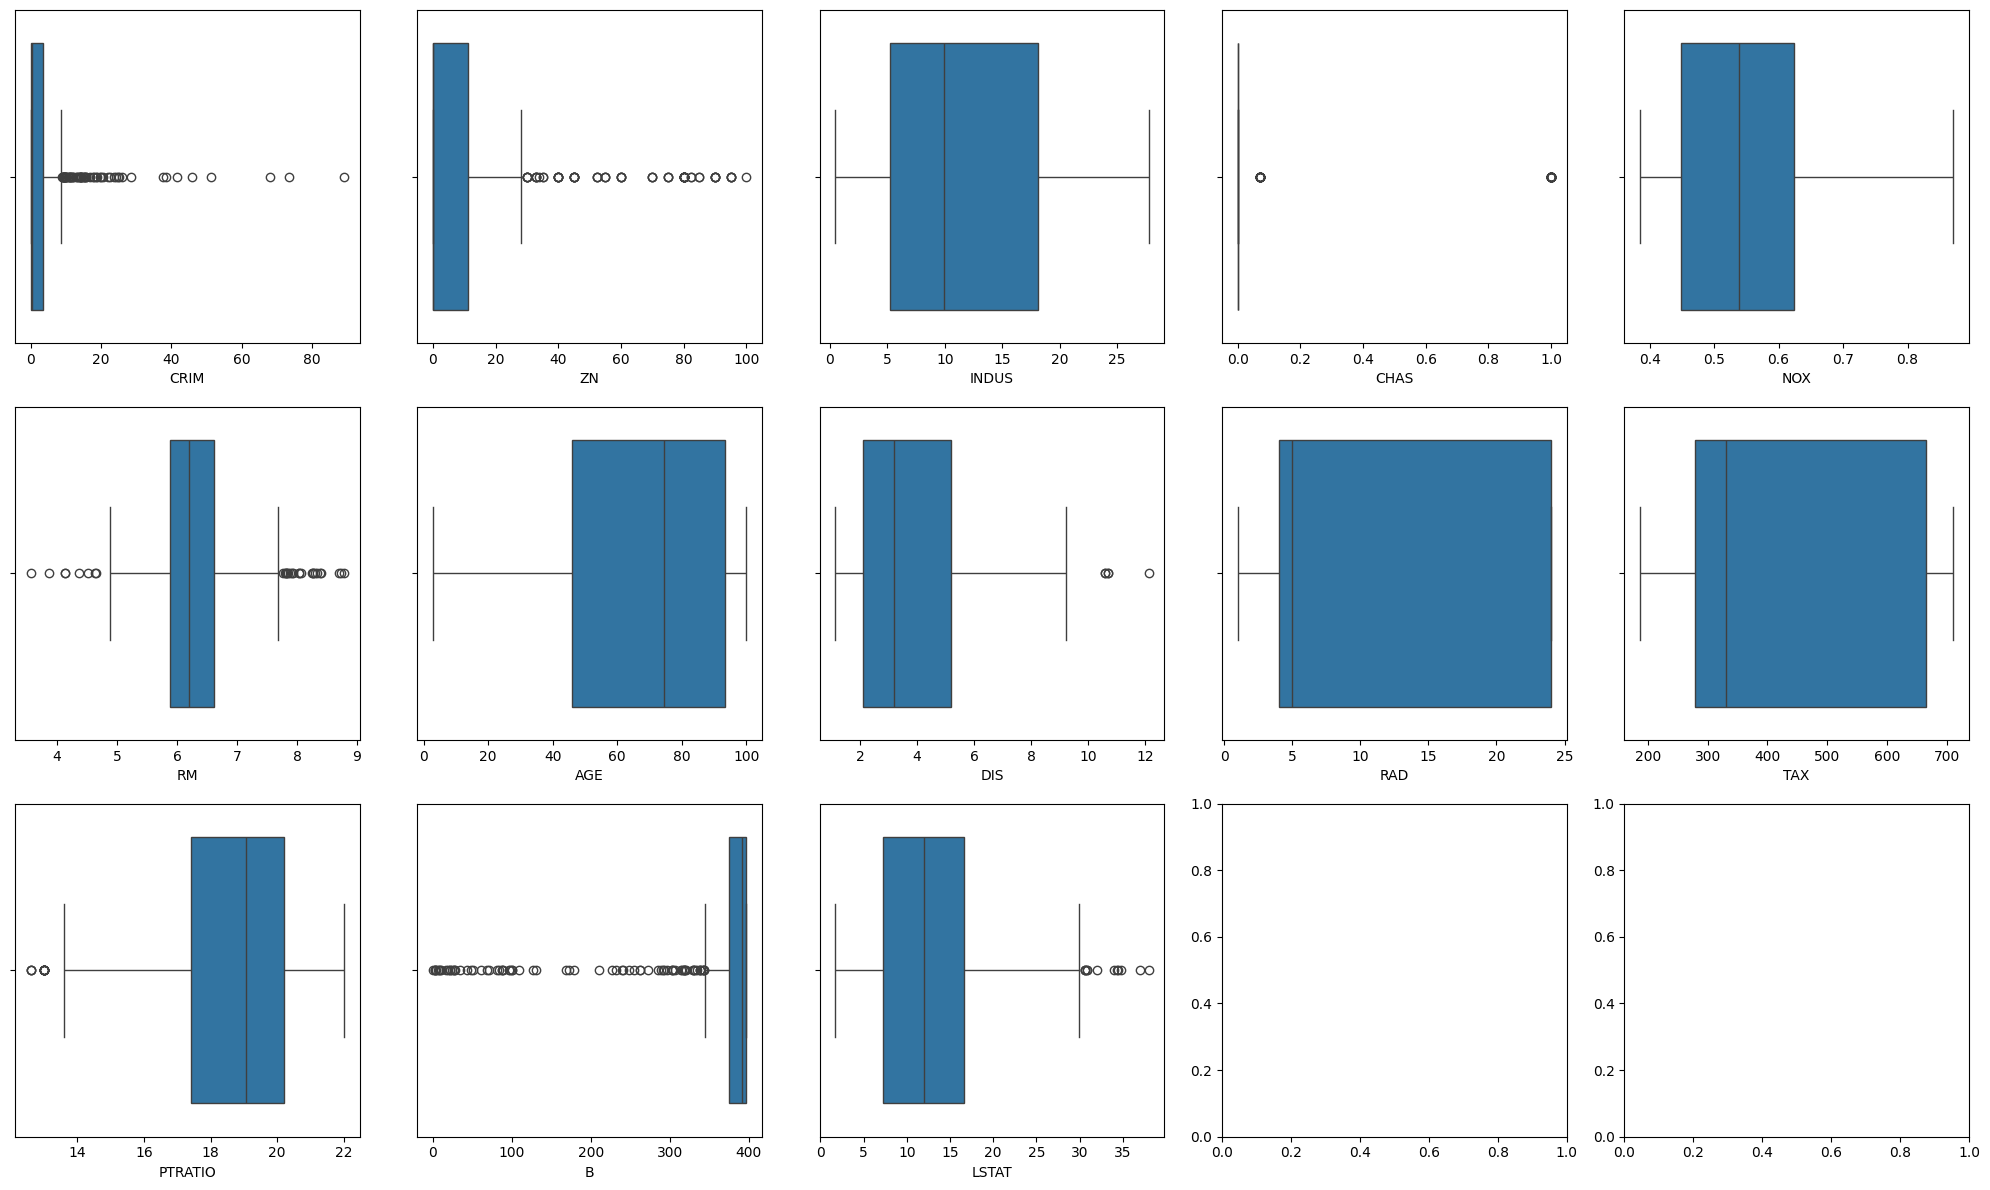

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[idx])

plt.tight_layout()
plt.show()


#### **From the above boxplots we could identify that ZN,CHAS,RM,DIS,PTRATIO,B,LSTAT has outliers and we should handle them.**

##**Capping to handle outliers**

In [ ]:
import numpy as np
for col in ['CRIM','ZN','CHAS','RM','DIS','PTRATIO','B','LSTAT']:
  q1, q3 = np.percentile(df[col], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

#####after handling outliers

<Figure size 800x500 with 0 Axes>

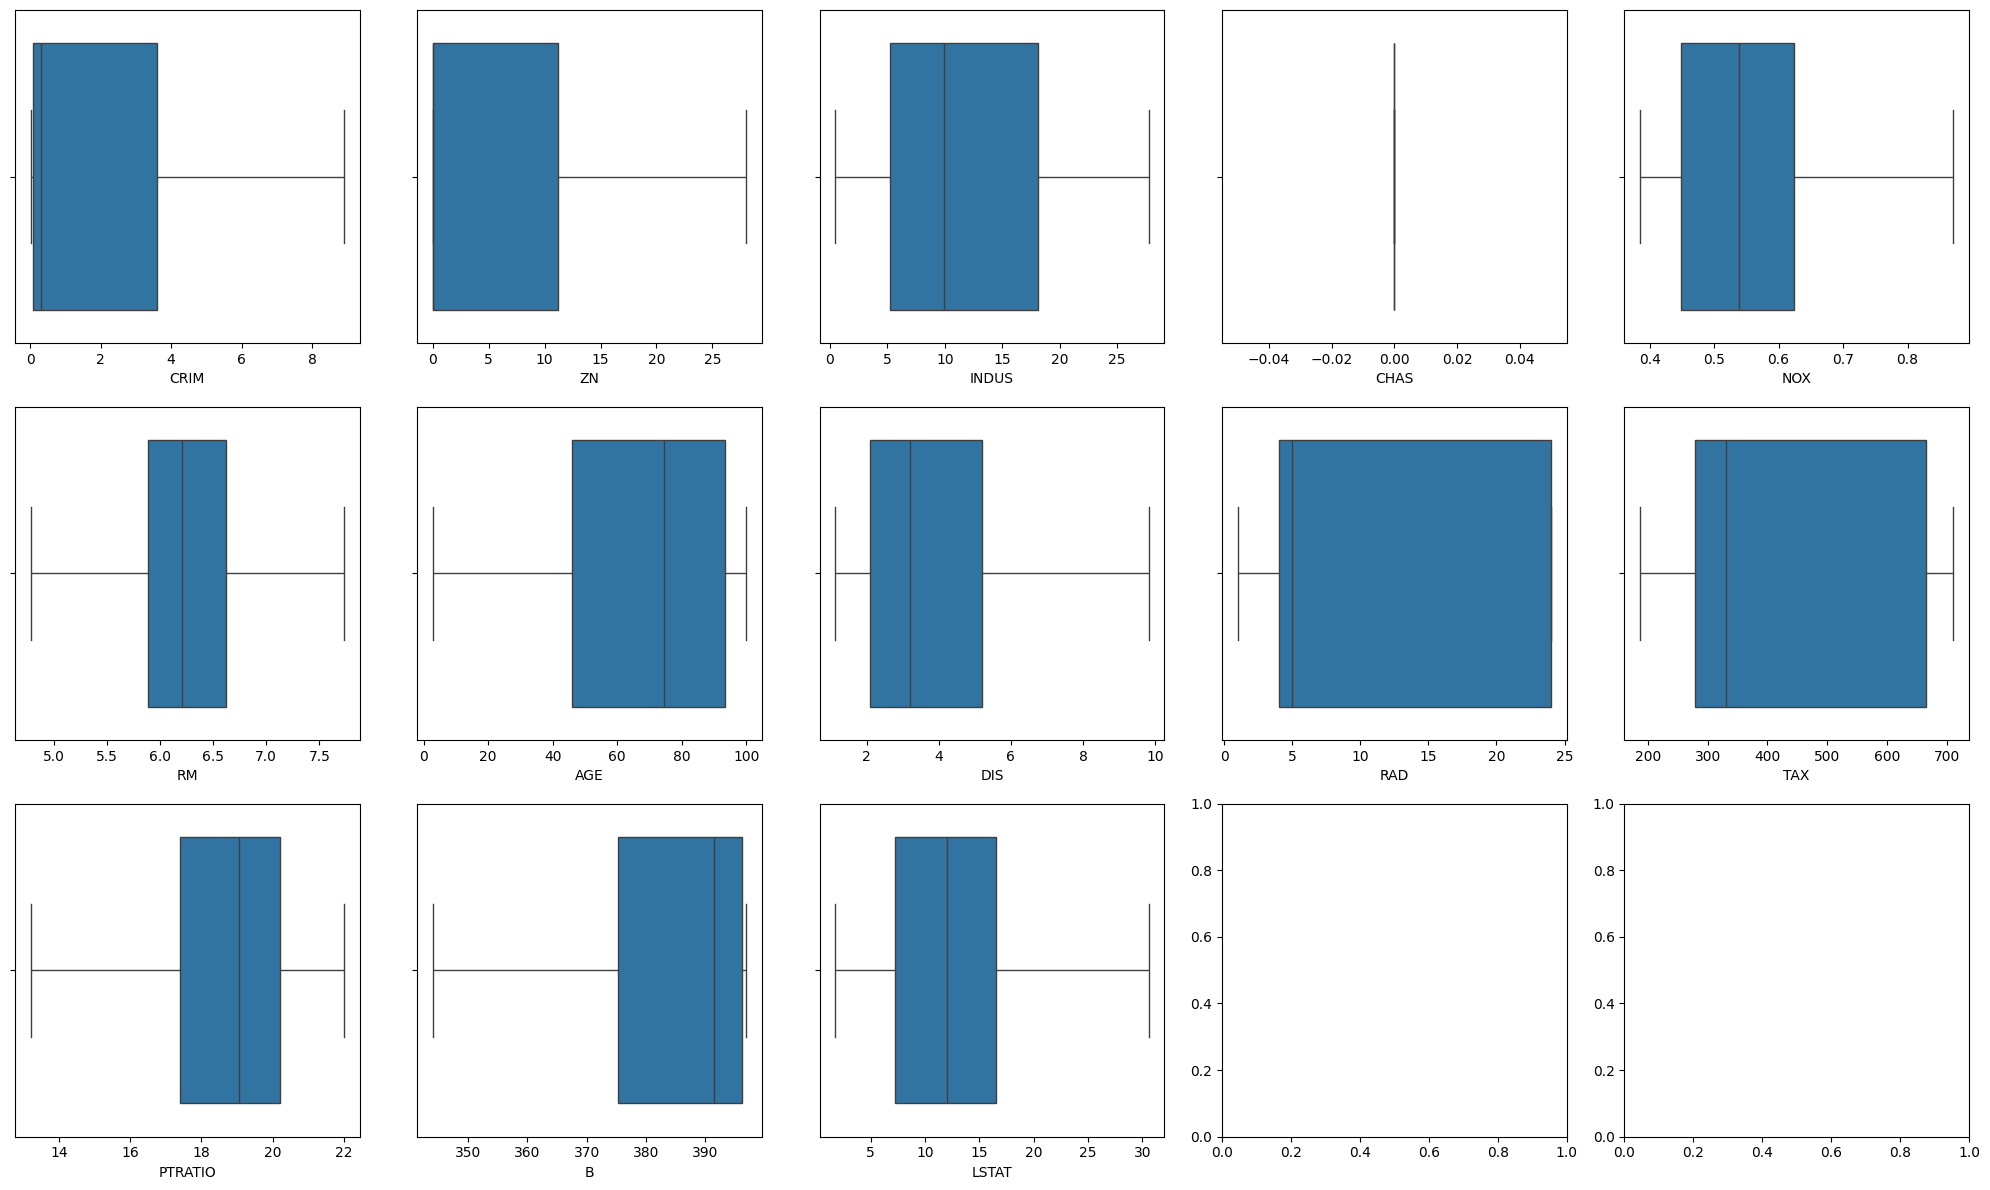

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 5))
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 12))
axes = axes.flatten()

features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for idx, feature in enumerate(features):
    sns.boxplot(data=df, x=feature, ax=axes[idx])

plt.tight_layout()
plt.show()

In [ ]:
df.drop('CHAS', axis=1, inplace=True)

In [ ]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


## **Correlation matrix**

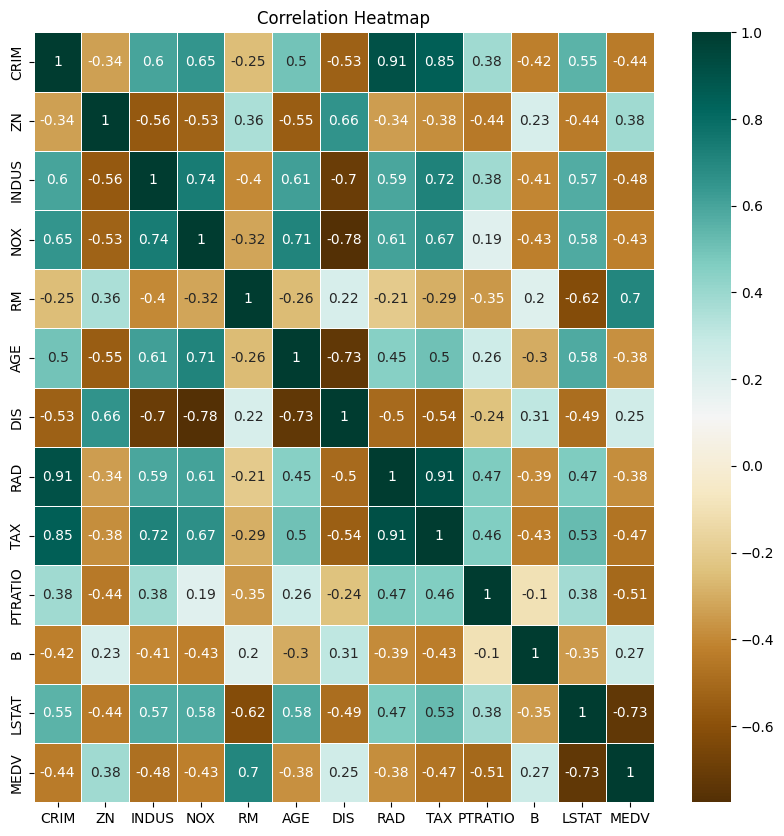

In [ ]:

 correlation_matrix = df.corr()
 plt.figure(figsize=(10, 10))
 sns.heatmap(correlation_matrix, annot=True,cmap='BrBG',linewidths=0.5)
 plt.title('Correlation Heatmap')
 plt.show()

## **Histogram**

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'NOX'}>],
       [<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'RAD'}>],
       [<Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>, <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

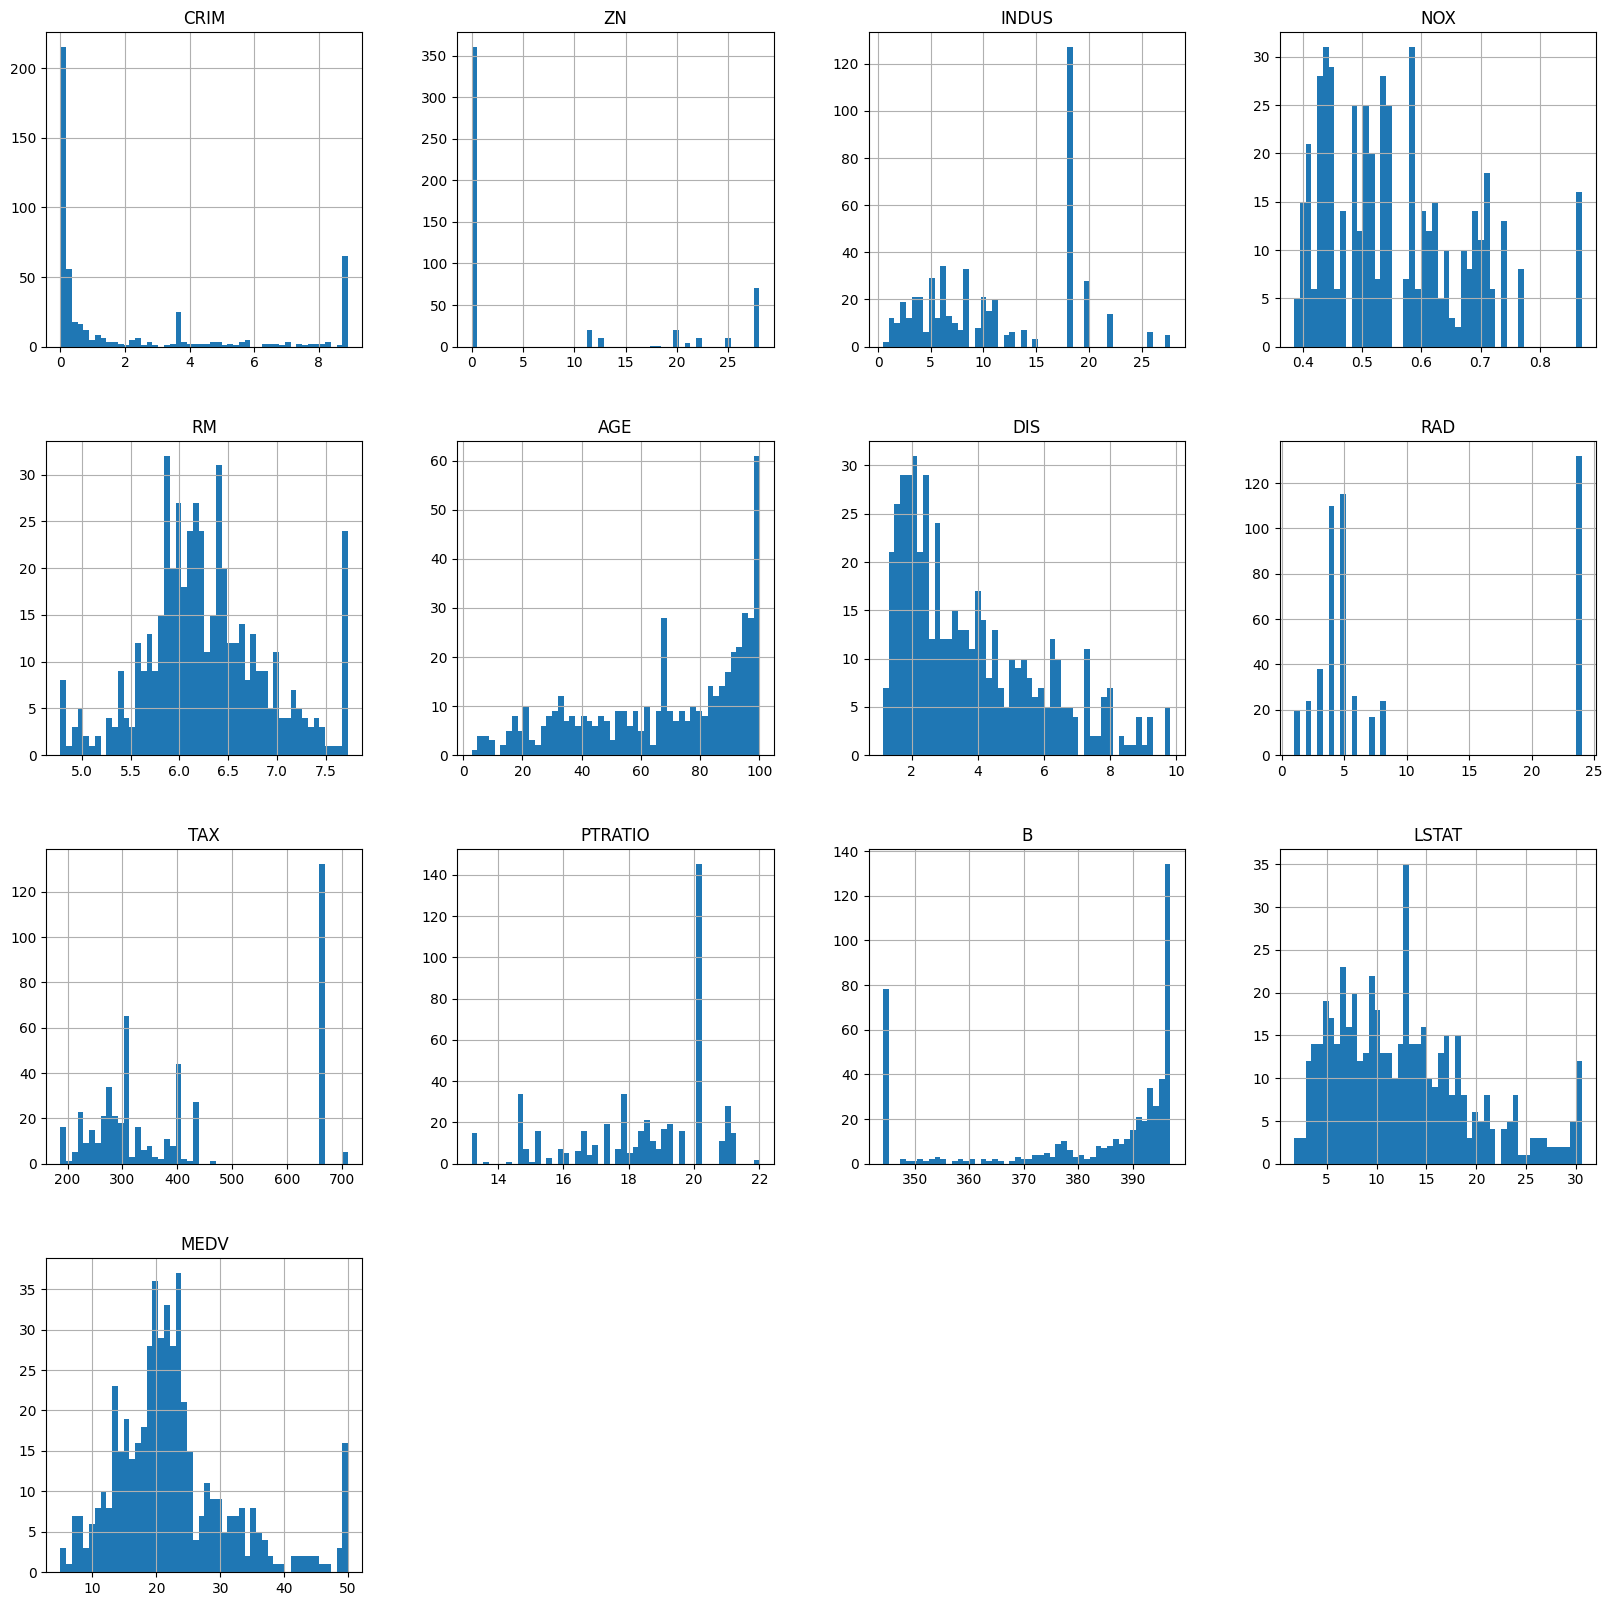

In [ ]:
 df.hist(bins=50,figsize=(20,20))

## **Check the skewness**

In [ ]:
skewness = df.skew()
print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 CRIM       1.257769
ZN         1.202984
INDUS      0.309871
NOX        0.729308
RM         0.296640
AGE       -0.594261
DIS        0.908467
RAD        1.004815
TAX        0.669956
PTRATIO   -0.762495
B         -1.164208
LSTAT      0.787162
MEDV       1.108098
dtype: float64


### **From above we should identify that**

####**Highly Right-Skewed ( > 1 ):**


*   RIM (1.257769)
*   ZN (1.202984)


*   MEDV (1.108098)
*   RAD (1.004815)


####**Moderately Right-Skewed (0.5 - 1):**


*   NOX (0.729308)
*   DIS (0.908467)


* TAX (0.669956)
* LSTAT (0.787162)

####**Nearly Symmetric (-0.5 to 0.5):**
*  INDUS (0.309871)
*   RM (0.296640)



####**Left-Skewed (< -0.5):**


*   AGE (-0.594261)
*   PTRATIO (-0.762495)
*   B (-1.164208)








###**We should do log transform on right skewed and oderately skewed. should avoid log transform for left skew**

In [ ]:
import numpy as np

# Apply log1p (log(1 + x)) to avoid log(0) issues
df['CRIM'] = np.log1p(df['CRIM'])
df['ZN'] = np.log1p(df['ZN'])
df['MEDV'] = np.log1p(df['MEDV'])
df['RAD'] = np.log1p(df['RAD'])
df['NOX'] = np.log1p(df['NOX'])
df['DIS'] = np.log1p(df['DIS'])
df['TAX'] = np.log1p(df['TAX'])
df['LSTAT'] = np.log1p(df['LSTAT'])

# **skewness after log transformation**

In [ ]:
 #After preprocessing
 skewness = df.skew()
 print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 CRIM       0.819475
ZN         0.981119
INDUS      0.309871
NOX        0.584347
RM         0.296640
AGE       -0.594261
DIS        0.305238
RAD        0.532760
TAX        0.331753
PTRATIO   -0.762495
B         -1.164208
LSTAT     -0.268862
MEDV      -0.241244
dtype: float64


##**Scatter plot**

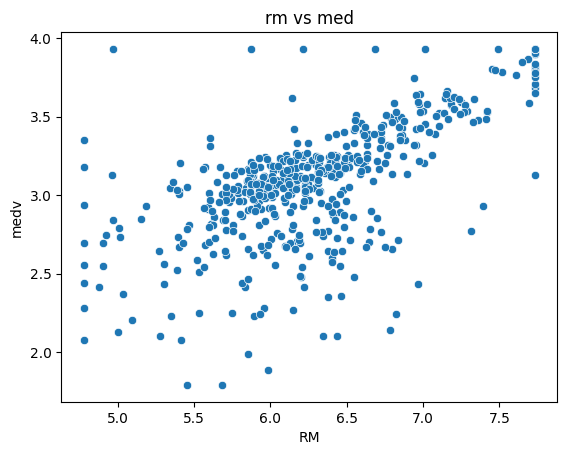

In [ ]:
sns.scatterplot(x=df['RM'], y=df['MEDV'])
plt.xlabel('RM')
plt.ylabel('medv')
plt.title('rm vs med')
plt.show()

### **Histogram of price**

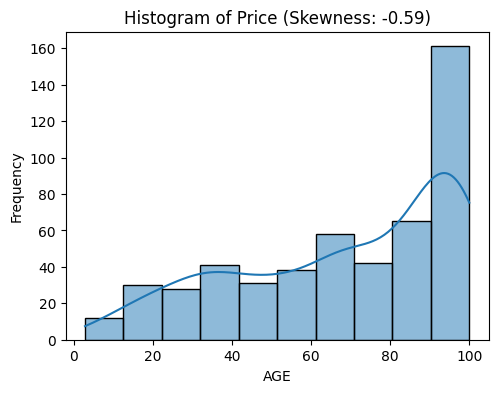

In [ ]:
skewness_price = df['AGE'].skew()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['AGE'], kde=True)
plt.title(f'Histogram of Price (Skewness: {skewness_price:.2f})')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

##**MODEL BUILDING**

###**Feature Scaling**

In [ ]:
from sklearn.utils import shuffle
df= shuffle(df, random_state=100)
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
num_vars = ['CRIM','ZN','INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

### **Drop Nan values in  train and test**

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()
print(X_train.shape)
print(y_train.shape)
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

(404, 12)
(404,)


###**Regression Model Summary:**

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print("Regression Model Summary:")
print(model.summary())

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     91.26
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          2.41e-105
Time:                        14:28:38   Log-Likelihood:                 81.327
No. Observations:                 404   AIC:                            -136.7
Df Residuals:                     391   BIC:                            -84.64
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9834     

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)


### **R^2 , MAE,MSE,RMSE VALUES :**

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared: 0.80


 **After applying preprocessing steps such as handling missing values, capping outliers, log transformation, and feature scaling, we evaluated the performance of our multiple linear regression model. The results are as follows:**

**Root Mean Squared Error (RMSE): 0.17 → The standard deviation of the residuals is small, suggesting low error variance.**

**R-squared (R²): 0.80 → The model explains 80% of the variance in the target variable, indicating a strong fit .**

###**Residual Analysis**

In [ ]:
residuals = y_train - model.predict(X_train_sm)

# Print first few residuals for verification
print(residuals.head())

155   -0.108547
351   -0.008882
168    0.042864
334   -0.195839
163    0.176799
dtype: float64


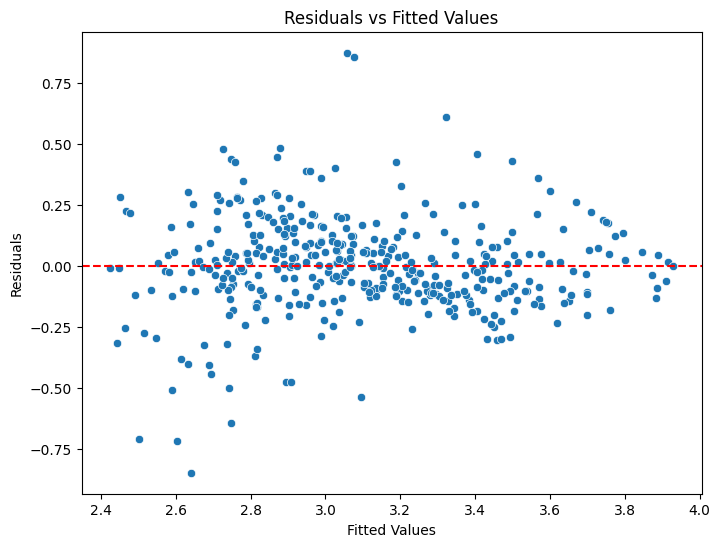

In [ ]:
# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.predict(X_train_sm), y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

####**Heteroscedasticity (variance of residuals increases), meaning model struggles with high/low values.**

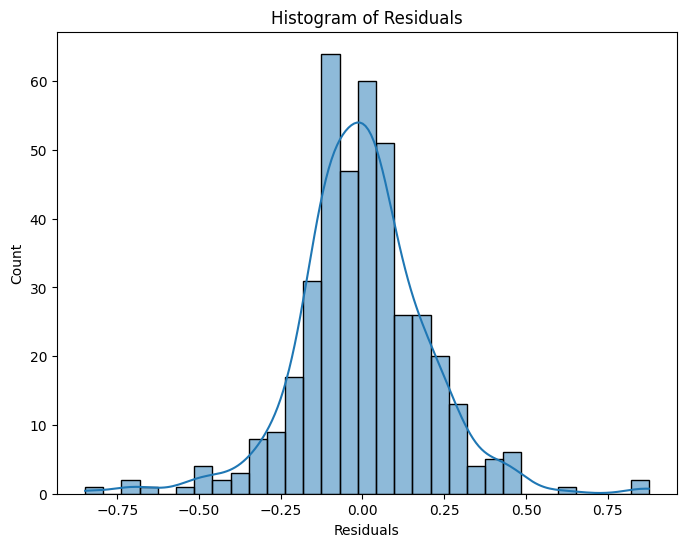

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

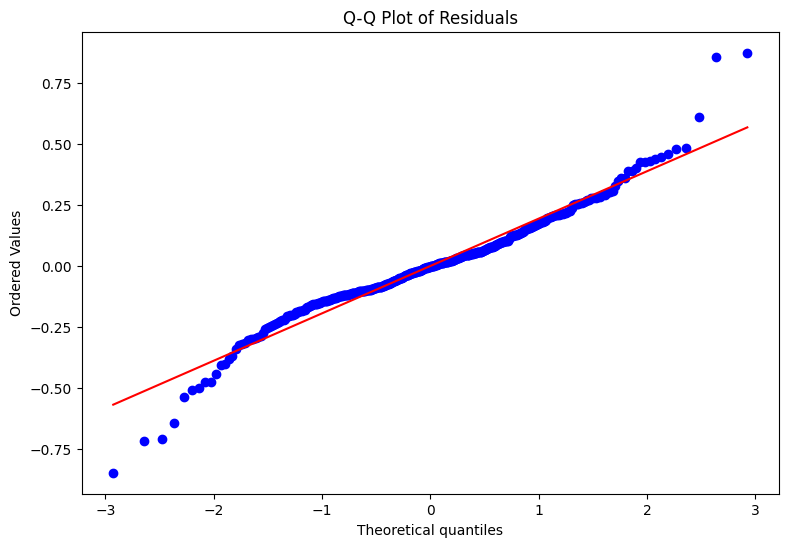

In [ ]:
 # Q-Q Plot
 plt.figure(figsize=(9, 6))
 probplot(residuals, dist="norm", plot=plt)
 plt.title('Q-Q Plot of Residuals')
 plt.show()

#### **Mild skewness exists , residuals aren’t perfectly normal but not highly skewed either.**
####**Outliers in both tails, Extreme values deviate from normality, which can impact model accuracy.**
#### **If errors are small and linearity holds, this may not be a big problem**

### **SUMMARY 1:**
####Model 1 applied handling of missing values, outlier capping, log transformation, and feature scaling. It achieved an R² of 0.80 and an MSE of 0.17, showing strong predictive accuracy with minimal error. This model effectively addressed skewness and outliers, making it a solid choice.

#**PREPROCESSING 2:**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select numerical features (excluding target variable)
features = X_train.columns

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(features))]

# Display VIF values
print(vif_data)

    Feature        VIF
0      CRIM  11.023865
1        ZN   2.692118
2     INDUS  11.292392
3       NOX  15.201179
4        RM   9.289815
5       AGE  17.866407
6       DIS  10.672806
7       RAD  23.770546
8       TAX  20.123552
9   PTRATIO  12.377025
10        B   5.975015
11    LSTAT  21.105276


**VIF values are extremely high, indicating severe multicollinearity in your dataset. Features like TAX (695), B (405), NOX (164), PTRATIO (139), DIS (64), LSTAT (63) are highly correlated with other features.**

In [ ]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
if 'B' in X_train.columns:
    X_train = X_train.drop(columns=['B'])
    X_test = X_test.drop(columns=['B'])

In [ ]:
X_train = X_train.drop(columns=['TAX'])
X_test = X_test.drop(columns=['TAX'])

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()
print(X_train.shape)
print(y_train.shape)
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

(404, 10)
(404,)


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print("Regression Model Summary:")
print(model.summary())

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          9.89e-105
Time:                        14:31:32   Log-Likelihood:                 74.994
No. Observations:                 404   AIC:                            -128.0
Df Residuals:                     393   BIC:                            -83.97
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6749     

In [ ]:
# Add constant (intercept term) to the scaled test data
X_test_sm = sm.add_constant(X_test)
# Predict using the trained model
y_pred = model.predict(X_test_sm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17
R-squared: 0.80


### **Even after dropping TAX, B there is no significant difference in the model.**

### **SUMMARY 2:**
####Model 2 additionally removed TAX and B based on VIF analysis to reduce multicollinearity. However, the performance remained unchanged (R² = 0.80, MSE = 0.17), indicating that these features had little impact. While this model simplifies interpretation, it does not improve accuracy.

##**PREPROCESSING 3**

# Import libraries

In [ ]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 import statsmodels.api as sm
 from scipy.stats import probplot

# Read dataset

In [ ]:
df=pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Decription

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Handle null values

In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
 # Handle missing values
 df['CRIM'].fillna(df['CRIM'].mean(), inplace=True)
 df['INDUS'].fillna(df['INDUS'].mean(), inplace=True)
 df['ZN'].fillna(df['ZN'].mean(), inplace=True)
 df['CHAS'].fillna(df['CHAS'].mean(), inplace=True)
 df['AGE'].fillna(df['AGE'].mean(), inplace=True)
 df['LSTAT'].fillna(df['LSTAT'].mean(), inplace=True)

# Check skewness

In [ ]:
 skewness = df.skew()
 print("Skewness for each feature:\n", skewness)

Skewness for each feature:
 CRIM       5.318370
ZN         2.302295
INDUS      0.309871
CHAS       3.450763
NOX        0.729308
RM         0.403612
AGE       -0.594261
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.927291
MEDV       1.108098
dtype: float64


#Log Transform

In [ ]:
#Reducing the size
df['PTRATIO'] = np.log(df['PTRATIO'])
df['B'] = np.log(df['B'])
df['TAX'] = np.log(df['TAX'])
df['CRIM'] = np.log(df['CRIM'])

###trying to do log transformation with different coloumns to check whether r2 or rmse changes

#  MODEL BUILDING


In [ ]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.dropna()
y_train = y_train.dropna()
print(X_train.shape)
print(y_train.shape)
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

(404, 13)
(404,)


In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print("Regression Model Summary:")
print(model.summary())

Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     84.06
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          2.23e-104
Time:                        14:32:58   Log-Likelihood:                -1205.3
No. Observations:                 404   AIC:                             2439.
Df Residuals:                     390   BIC:                             2495.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6564     

In [ ]:
 X_test_sm = sm.add_constant(X_test)
 y_pred = model.predict(X_test_sm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics:
Mean Absolute Error (MAE): 3.05
Mean Squared Error (MSE): 23.88
Root Mean Squared Error (RMSE): 4.89
R-squared: 0.67


### **SUMMARY 3:**
#### Model 3 applied a selective log transformation to PTRATIO, B, TAX, and CRIM but resulted in a lower R² of 0.67 and a significantly higher MSE of 4.89, suggesting that improper transformations negatively affected performance. This model is not suitable as it introduces excessive error.

In [ ]:
from prettytable import PrettyTable

# Create table
table = PrettyTable()

# Set column names
table.field_names = ["Model", "R Squared Value", "Mean Squared Error (MSE)"]

# Add rows
table.add_row([
    "After Preprocessing 1:\n\n- Handling Missing Values\n- Capping Outliers\n- Log Transformation\n- Feature Scaling",
    0.80,
    0.17
])

table.add_row([
    "After Preprocessing 2:\n\n- Handling Missing Values\n- Capping Outliers\n- Log Transformation\n- Feature Scaling\n- VIF (Dropped TAX, B)",
    0.80,
    0.17
])

table.add_row([
    "After Preprocessing 3:\n\n- Handling Missing Values\n- Log Transformation (Only PTRATIO, B, TAX, CRIM)",
    0.67,
    4.89
])

# Set column alignments
table.align["Model"] = "l"
table.align["R Squared Value"] = "c"
table.align["Mean Squared Error (MSE)"] = "c"

# Force decimal formatting
table.float_format = ".2"  # Ensures two decimal places

# Print table
print(table)


+---------------------------------------------------+-----------------+--------------------------+
| Model                                             | R Squared Value | Mean Squared Error (MSE) |
+---------------------------------------------------+-----------------+--------------------------+
| After Preprocessing 1:                            |       0.80      |           0.17           |
|                                                   |                 |                          |
| - Handling Missing Values                         |                 |                          |
| - Capping Outliers                                |                 |                          |
| - Log Transformation                              |                 |                          |
| - Feature Scaling                                 |                 |                          |
| After Preprocessing 2:                            |       0.80      |           0.17           |
|         

# **RESULT:**

### After applying various preprocessing techniques, Model 1 achieved the best performance with an R² of 0.80 and an MSE of 0.17. Removing multicollinear features in Model 2 did not improve accuracy, while selective log transformations in Model 3 led to a significant drop in performance. Therefore, Model 1 is the most reliable choice for predicting MEDV.